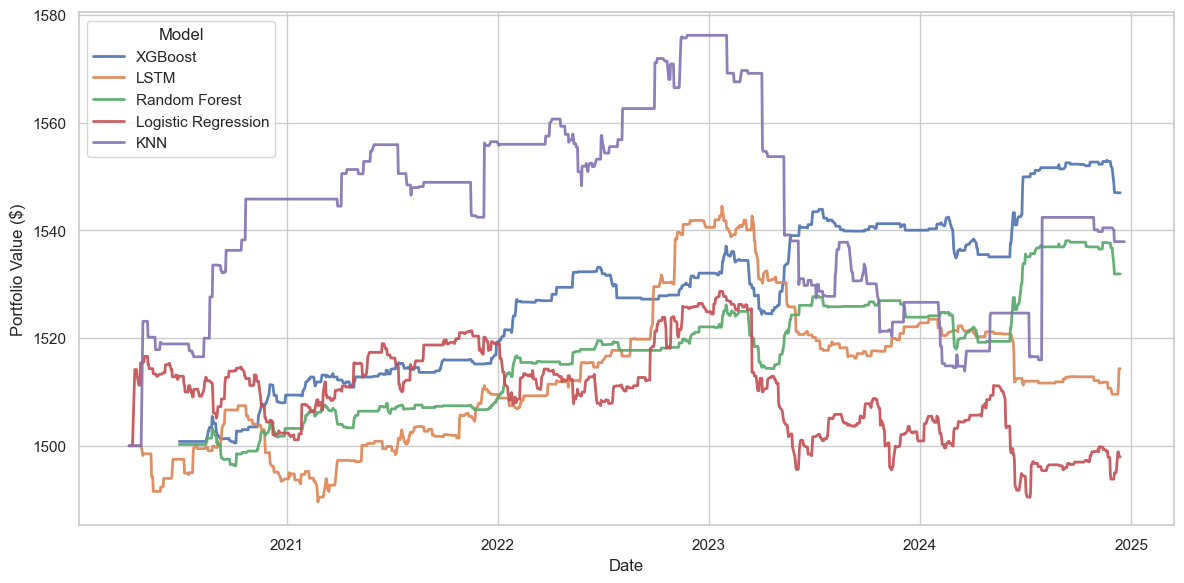

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lstm_eq = pd.read_csv("equity_curves/lstm_equity.csv", index_col = 0, parse_dates = True).squeeze()
rf_eq = pd.read_csv("equity_curves/random_forest_equity.csv", index_col = 0, parse_dates = True).squeeze()
lr_eq = pd.read_csv("equity_curves/logistic_regression_equity.csv", index_col = 0, parse_dates = True).squeeze()
knn_eq = pd.read_csv("equity_curves/knn_equity.csv", index_col = 0, parse_dates = True).squeeze()
xgb_eq = pd.read_csv("equity_curves/xgboost_equity.csv", index_col = 0, parse_dates = True).squeeze()

sns.set_theme(style = "whitegrid", context = "notebook")

plt.figure(figsize = (12, 6))
plt.plot(xgb_eq.index, xgb_eq.values, label = "XGBoost", alpha = 0.9, linewidth = 2)
plt.plot(lstm_eq.index, lstm_eq.values, label = "LSTM", alpha = 0.9, linewidth = 2)
plt.plot(rf_eq.index, rf_eq.values, label = "Random Forest", alpha = 0.9, linewidth = 2)
plt.plot(lr_eq.index, lr_eq.values, label = "Logistic Regression", alpha = 0.9, linewidth = 2)
plt.plot(knn_eq.index, knn_eq.values, label = "KNN", alpha = 0.9, linewidth = 2)

plt.xlabel("Date", fontsize = 12)
plt.ylabel("Portfolio Value ($)", fontsize = 12)

plt.legend(title = "Model", frameon = True, loc = "center left", bbox_to_anchor = (0, 0.85))
plt.tight_layout()
plt.grid(True)
plt.savefig("/Users/ak/Downloads/equity_curves.pdf", dpi = 400, bbox_inches = "tight")
plt.show()

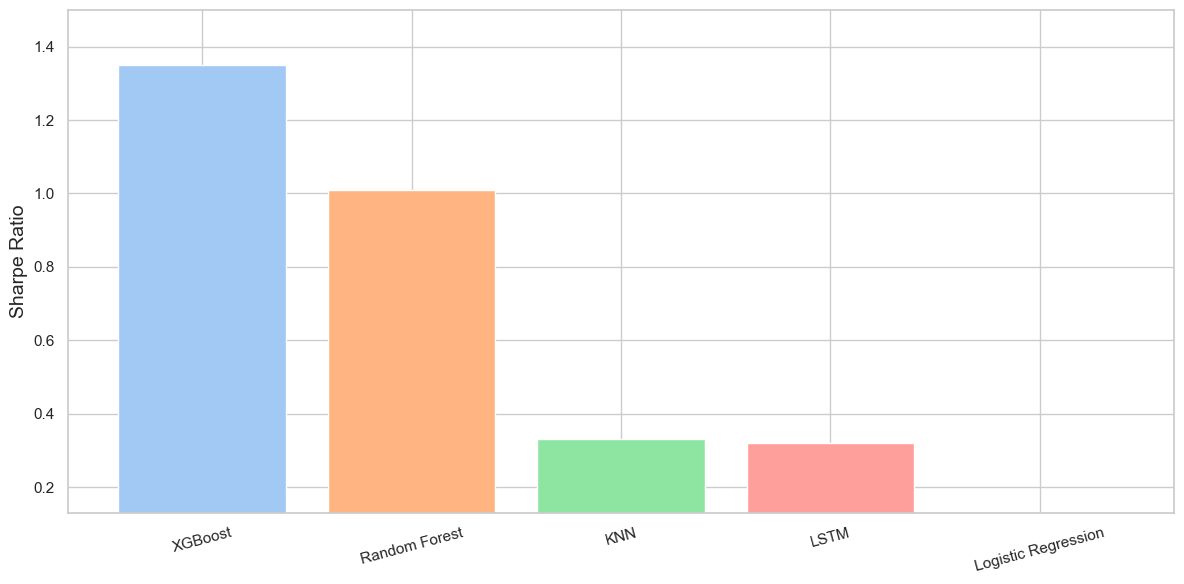

In [10]:
all_sharpe = {
    "XGBoost": 1.35,
    "LSTM": 0.32,
    "Random Forest": 1.01,
    "KNN": 0.33,
    "Logistic Regression": -0.02
}

sorted_sharpe = dict(sorted(all_sharpe.items(), key = lambda x: x[1], reverse = True))

fig, ax = plt.subplots(figsize = (12, 6))

bars = ax.bar(
    sorted_sharpe.keys(),
    sorted_sharpe.values(),
    color=sns.color_palette("pastel"),
)

ax.set_xlabel("", fontsize = 14)
ax.set_ylabel("Sharpe Ratio", fontsize = 14)

ax.set_ylim(min(sorted_sharpe.values()) + 0.15, max(sorted_sharpe.values()) + 0.15)
ax.tick_params(axis='x', labelsize = 11, rotation = 15)
ax.tick_params(axis='y', labelsize = 11)

plt.tight_layout()
plt.savefig("/Users/ak/Downloads/sharpes.pdf", dpi = 400, bbox_inches = "tight")
plt.show()

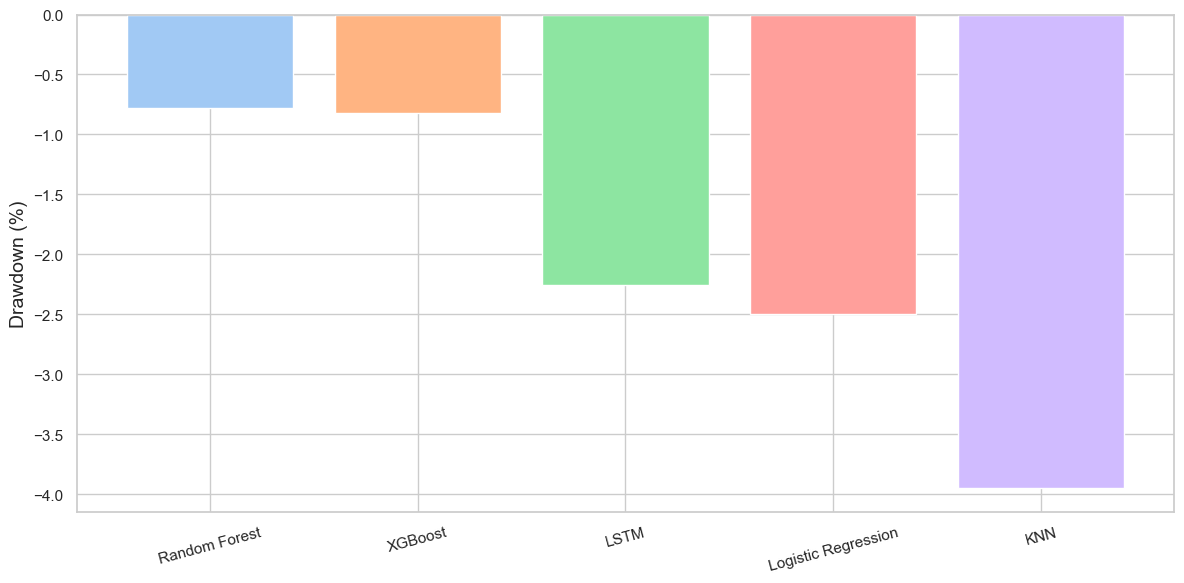

In [11]:
all_drawdown = {
    "XGBoost": -0.82,
    "LSTM": -2.26,
    "Random Forest": -0.78,
    "KNN": -3.95,
    "Logistic Regression": -2.50
}

sorted_drawdown = dict(sorted(all_drawdown.items(), key = lambda x: x[1], reverse = True))

fig, ax = plt.subplots(figsize = (12, 6))

bars = ax.bar(
    sorted_drawdown.keys(),
    sorted_drawdown.values(),
    color = sns.color_palette("pastel"),
)

ax.set_ylabel("Drawdown (%)", fontsize=14)
ax.set_xlabel("")

ax.tick_params(axis = 'x', labelsize = 11, rotation = 15)
ax.tick_params(axis = 'y', labelsize = 11)

plt.tight_layout()
plt.savefig("/Users/ak/Downloads/max_drawdown.pdf", dpi = 400, bbox_inches = "tight")
plt.show()